# Artem Moskalev. Home Assignment -- 5

# Part 2 (19 + 10  pt.): Clustering

<br/> <!--Intentionally left blank-->

In [1]:
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
import scipy.stats as sstats

%matplotlib inline
import matplotlib.pyplot as plt

<br/> <!--Intentionally left blank-->

## Task 1 (11 + 4 pt.): Practice with Different Clustering Algorithms

In this task you are asked to try different clustering algorithms from sklearn on the provided data

True number of clusters is 15
Silhouette Score= 0.608894460889


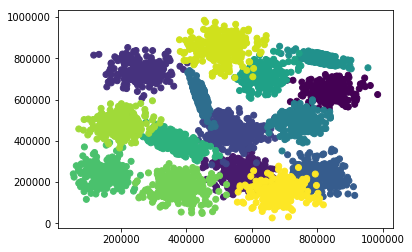

In [2]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
print('Silhouette Score=',silhouette_score(points, labels))
plt.scatter(points[:,0], points[:,1], c=labels)
plt.show()

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *adjusted mutual information*.

For each algorithm **your task** is to
1. **(4 pt.)** Try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`; **use these parameters hereafter**;
2. **(4 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
3. **(3 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

<span style="color:green">**Bonus**</span>
You get extra **+4 pt.** if you produce all your plots in one place and make as few
visualizations as possible (counting subplots). This means that you should depict the
comparison in a clear and comprehensible, yet concise manner.

**HINT** <span style="/*color:white;*/" title="select all">If plots cloud somehow overlay
one another and not sit side by side or in different cells...</span>

In [3]:
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
np.random.seed(1011)

*AMI - Adjusted Mutual Info score
*SS - Silhouette Score


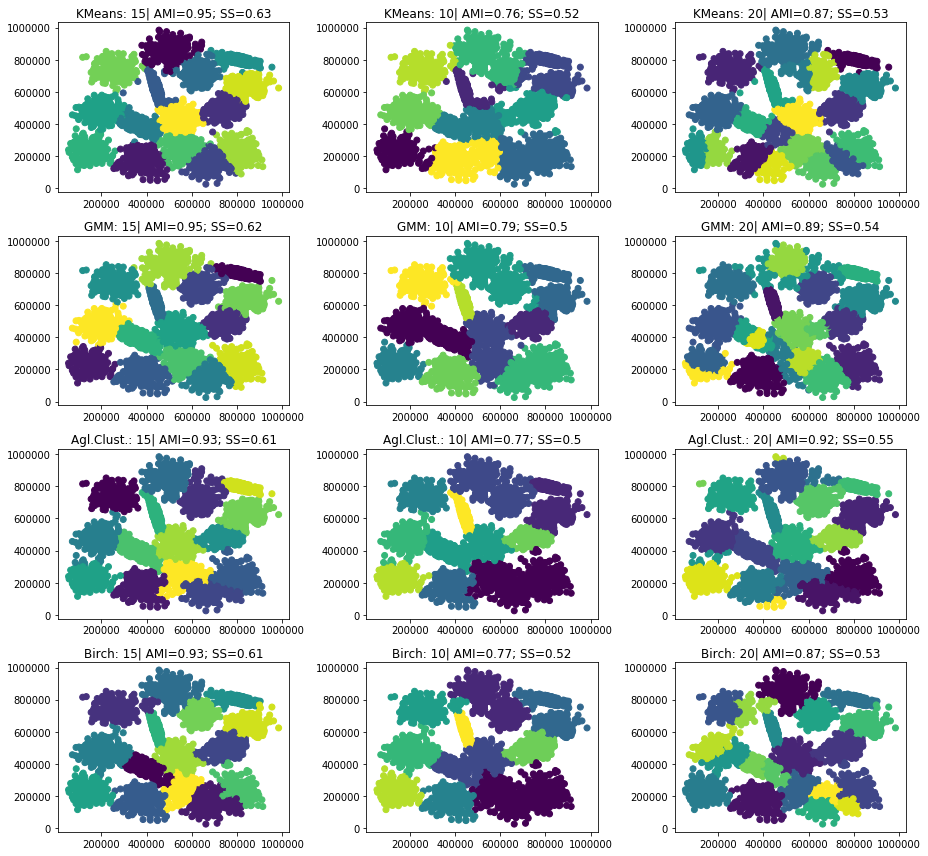

In [4]:
fig, ax = plt.subplots(4,3, figsize=(13,12))
algorithms, predictions = (KMeans(), GaussianMixture(), AgglomerativeClustering(), Birch()), list()
params=(({'n_clusters':15, 'n_init':20, 'max_iter':450},{'n_clusters':10, 'n_init':20, 'max_iter':450},{'n_clusters':20, 'n_init':20, 'max_iter':450}),
        ({'n_components':15,'reg_covar':3e-3,'n_init':3},{'n_components':10,'reg_covar':3e-3,'n_init':3},{'n_components':20,'reg_covar':3e-3,'n_init':3}),
        ({'n_clusters':15,'linkage':'average','compute_full_tree':True},{'n_clusters':10,'linkage':'average','compute_full_tree':True},{'n_clusters':20,'linkage':'average','compute_full_tree':True}),
        ({'n_clusters':15, 'threshold':2.5, 'branching_factor':30},{'n_clusters':10,'threshold':2.5, 'branching_factor':30},{'n_clusters':20,'threshold':2.5, 'branching_factor':30}))

titles=(('KMeans: 15', 'KMeans: 10', 'KMeans: 20'),
        ('GMM: 15', 'GMM: 10', 'GMM: 20'),
        ('Agl.Clust.: 15', 'Agl.Clust.: 10', 'Agl.Clust.: 20'),
        ('Birch: 15', 'Birch: 10', 'Birch: 20'))

for i in range(len(algorithms)):
    for j in range(3):
        current_alg = algorithms[i].set_params(**params[i][j])
        try:
            pred=current_alg.fit_predict(points)
        except:
            current_alg.fit(points)
            pred = current_alg.predict(points)
        predictions.append(pred)
        ax[i,j].scatter(points[:,0],points[:,1], c = pred)
        sublabel = '| AMI='+str(np.round(adjusted_mutual_info_score(labels, pred),2)) + '; SS=' + \
                    str(np.round(silhouette_score(points, pred),2))
        ax[i,j].set_title(titles[i][j] + sublabel)
        
plt.tight_layout();
print('*AMI - Adjusted Mutual Info score')
print('*SS - Silhouette Score')

#### Bonus. Visualize all the stuff on one plot:

I suggest three subplots scheme, where on each subplot we will just see differences in clustering.

In [5]:
def cluster_diff(cluster1, cluster2, points, threshold=5):
    diff = cluster1 - cluster2
    order = np.array(np.unique(diff, return_counts=True))
    order = order[:,np.argsort(order[1])][0][:threshold]
    out = np.zeros_like(diff, dtype=np.float32)
    for i in range(order.shape[0]):
        out = out + (diff == order[i]).astype(np.float32)
    return points[out!=0]

In [6]:
km1, gm1, ag1, w1 =cluster_diff(labels, predictions[0], points, 7), cluster_diff(labels, predictions[3], points, 9), cluster_diff(labels, predictions[6], points, 7), cluster_diff(labels, predictions[9], points, 5)
km2, gm2, ag2, w2 =cluster_diff(labels, predictions[1], points, 10), cluster_diff(labels, predictions[4], points, 10), cluster_diff(labels, predictions[7], points, 10), cluster_diff(labels, predictions[10], points, 10)
km3, gm3, ag3, w3 =cluster_diff(labels, predictions[2], points, 15), cluster_diff(labels, predictions[5], points, 15), cluster_diff(labels, predictions[8], points, 12), cluster_diff(labels, predictions[11], points, 12)

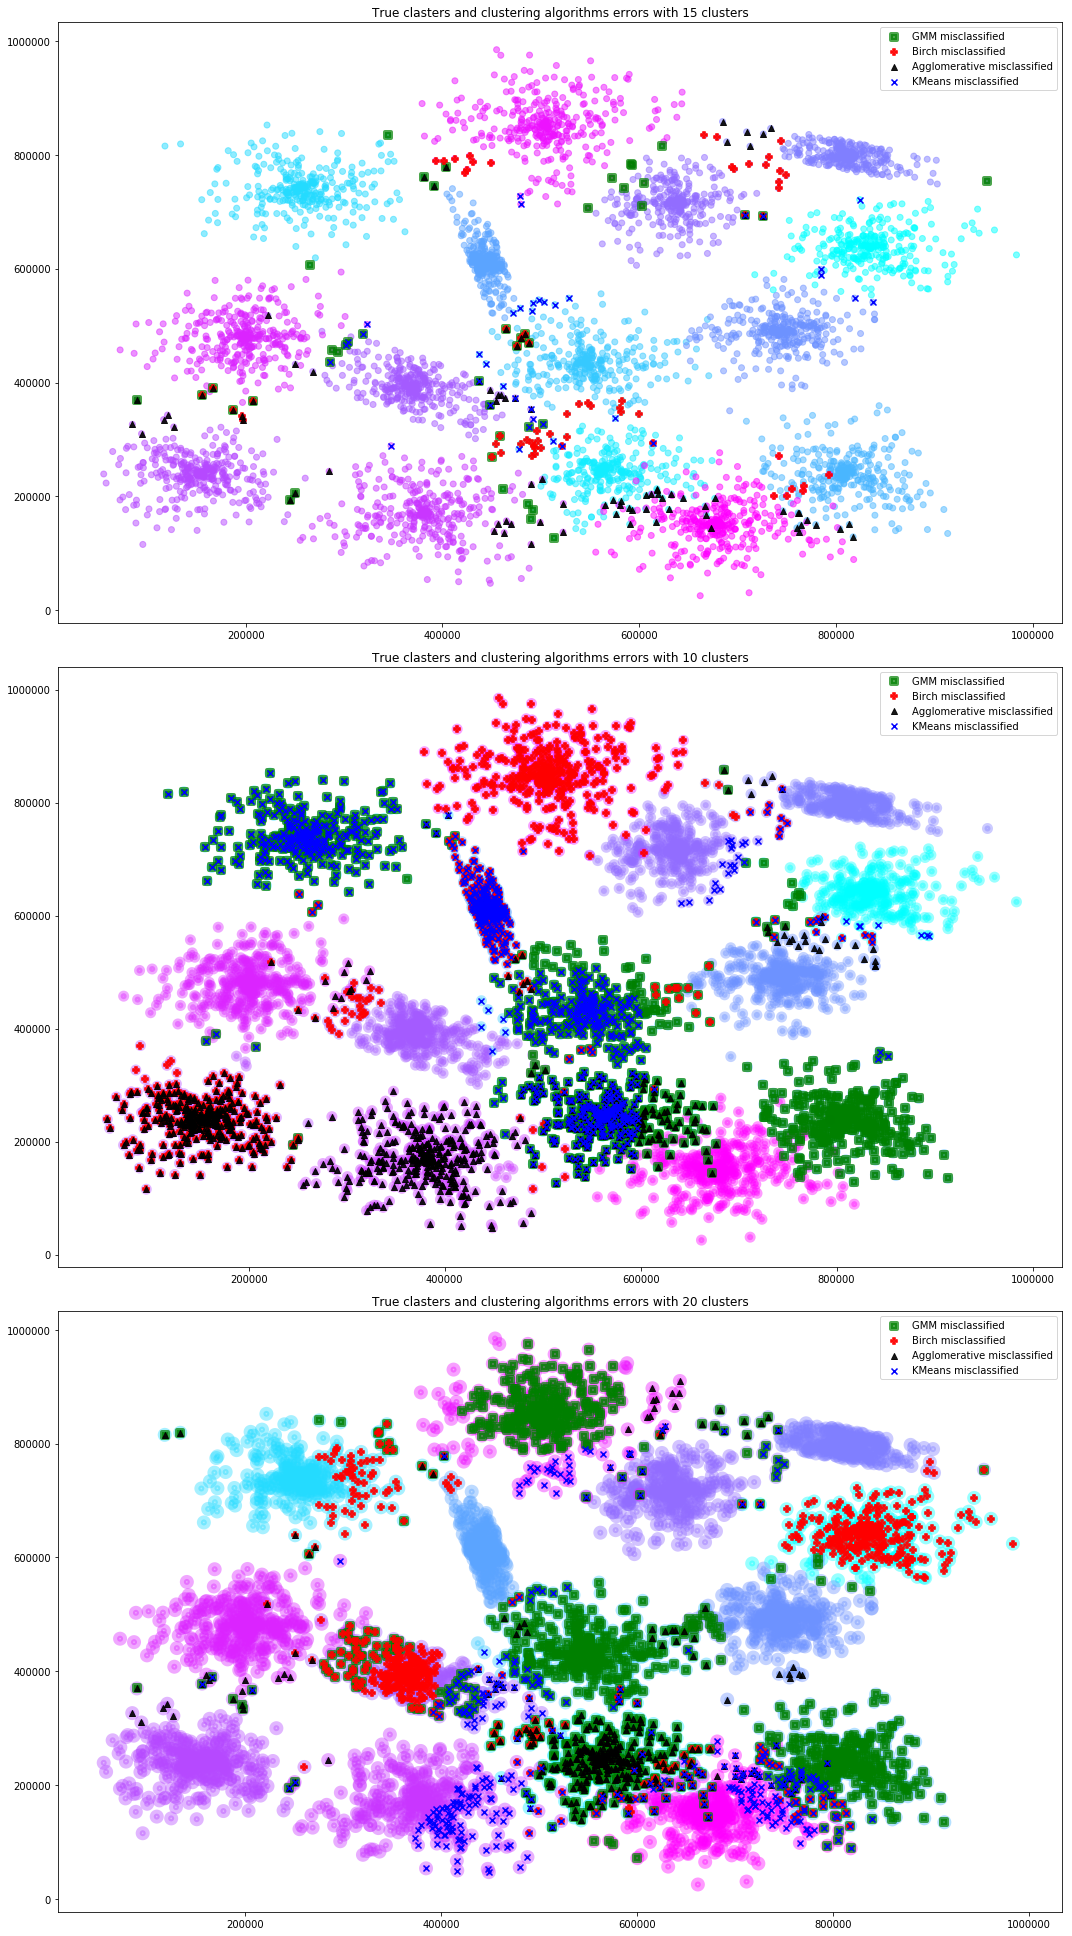

In [7]:
fig, ax = plt.subplots(3,1, figsize=(15,27))
ax[0].scatter(points[:,0],points[:,1], alpha=0.5, c=labels, cmap='cool')
ax[0].scatter(gm1[:,0],gm1[:,1], marker=',', c='g', label='GMM misclassified', linewidths=4, alpha=.7)
ax[0].scatter(w1[:,0],w1[:,1], marker='P', c='r', alpha=0.8, label='Birch misclassified',linewidths=2)
ax[0].scatter(ag1[:,0],ag1[:,1], marker='^', c='k', alpha=0.9, label='Agglomerative misclassified', linewidths=1)
ax[0].scatter(km1[:,0],km1[:,1], marker='x', c='b', label='KMeans misclassified',linewidths=3)
ax[0].set_title('True clasters and clustering algorithms errors with 15 clusters')
ax[0].legend()

ax[1].scatter(points[:,0],points[:,1], alpha=0.4, c=labels, cmap='cool', linewidths=5)
ax[1].scatter(gm2[:,0],gm2[:,1], marker=',', c='g', label='GMM misclassified', linewidths=4, alpha=.7)
ax[1].scatter(w2[:,0],w2[:,1], marker='P', c='r', alpha=0.8, label='Birch misclassified',linewidths=2)
ax[1].scatter(ag2[:,0],ag2[:,1], marker='^', c='k', alpha=0.9, label='Agglomerative misclassified', linewidths=1)
ax[1].scatter(km2[:,0],km2[:,1], marker='x', c='b', label='KMeans misclassified',linewidths=3)
ax[1].set_title('True clasters and clustering algorithms errors with 10 clusters')
ax[1].legend()

ax[2].scatter(points[:,0],points[:,1], alpha=0.4, c=labels, cmap='cool', linewidths=8)
ax[2].scatter(gm3[:,0],gm3[:,1], marker=',', c='g', label='GMM misclassified', linewidths=4, alpha=.7)
ax[2].scatter(w3[:,0],w3[:,1], marker='P', c='r', alpha=0.8, label='Birch misclassified',linewidths=2)
ax[2].scatter(ag3[:,0],ag3[:,1], marker='^', c='k', alpha=0.9, label='Agglomerative misclassified', linewidths=1)
ax[2].scatter(km3[:,0],km3[:,1], marker='x', c='b', label='KMeans misclassified',linewidths=3)
ax[2].set_title('True clasters and clustering algorithms errors with 20 clusters')
ax[2].legend()

plt.tight_layout();

<br/> <!--Intentionally left blank-->

## Task 2 (8 + 6 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So first based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**. Justify your choice. **(1 pt.)**

**BEGIN Solution**

As for me, the best performance is achieved with Gaussian Mixture Model('n_components':15,'reg_covar':3e-3,'n_init':3) - the best Adjusted Mutual Info and Silhouette scores closer to Silhouette score of the original data. Moreover, on plots, we can see, that in comparison with the second best model, KMeans, it produces more powerful clustering on our data. It's probably induced by the fact that several our clusters have no spheric structure. Furthermore, GMM is slightly more stable over the number of clusters.

**END Solution**

**Your task** is to
1. **(2 pt.)** For each bootstrap sample perform clusterization and calculate **silhouette score**;
2. **(3 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
3. **(2 pt.)** **Plot the metric** with the corresponding confidence intervals and chose the best number of clusters.

**Bonus** You may get extra **+2 pt.** if **in addition to** the silhouette score you use
**another metric** and **justify your choice of the algorithm**.
If you choose the [Gap statistic](https://web.stanford.edu/~hastie/Papers/gap.pdf),
*correctly implement and apply* it, you get extra **+4 pt.**.

In [13]:
from tqdm import tqdm_notebook

cluster_ns = np.array([3, 7, 11, 15, 19, 25])
sample_number = 100
allc_int = np.zeros_like(cluster_ns, dtype=np.object)
allvars = list()

allscores = np.zeros(len(cluster_ns), dtype=np.object)
for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    c_score = np.zeros(sample_number)
    for sample_index in tqdm_notebook(range(sample_number)):
        ridex = np.unique(np.random.randint(0,points.shape[0], points.shape[0]))
        current_sample = np.copy(points[ridex])
        
        current_model = GaussianMixture(n_components=n_clusters, reg_covar=3e-3)
        current_model.fit(current_sample)
        pred = current_model.predict(current_sample)
        c_score[sample_index] = silhouette_score(current_sample, pred)
        
    allscores[i_cn]=c_score
    c_var = np.var(allscores[i_cn])
    allvars.append(c_var)
    c_int = sstats.norm.interval(alpha=.95, loc = np.mean(allscores[i_cn]), scale=np.sqrt(c_var))
    allc_int[i_cn] = c_int

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [14]:
for i in range(allscores.shape[0]):
    print(cluster_ns[i], "'th cluster")
    print('-Var.:', allvars[i])
    print('-C.int.:', allc_int[i],'\n')

3 'th cluster
-Var.: 0.00185835874755
-C.int.: (0.29977985879671065, 0.46876279998037984) 

7 'th cluster
-Var.: 0.000428903818414
-C.int.: (0.37673013383255283, 0.45791181542329129) 

11 'th cluster
-Var.: 0.000268697463662
-C.int.: (0.4786081303556266, 0.54286356567073279) 

15 'th cluster
-Var.: 0.000586180829038
-C.int.: (0.55769290490956913, 0.65259895353091135) 

19 'th cluster
-Var.: 0.000156609437733
-C.int.: (0.53397716331523259, 0.58303258935494351) 

25 'th cluster
-Var.: 0.00109541345576
-C.int.: (0.40887911256116249, 0.53861708976066769) 



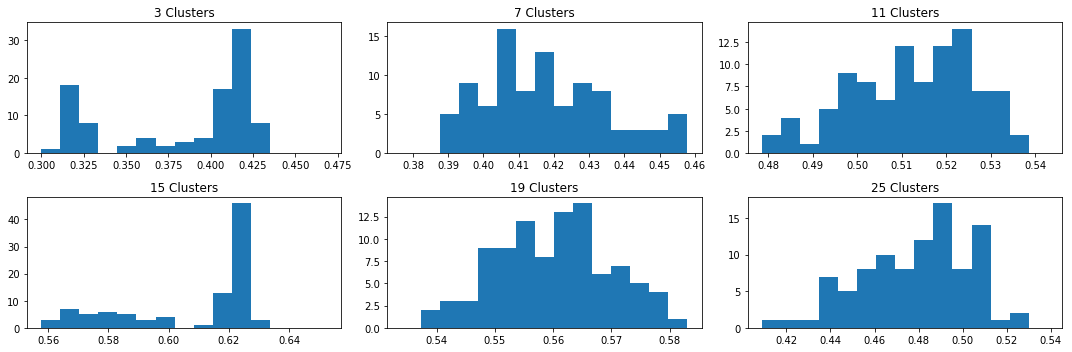

In [15]:
fig, ax = plt.subplots(2,3, figsize=(15,5))
adx = 0

for i in range(2):
    for j in range(3):
        ax[i,j].hist(allscores[adx], bins=15, range=allc_int[adx])
        ax[i,j].set_title(str(cluster_ns[adx])+ ' Clusters')
        adx+=1
        
plt.tight_layout();

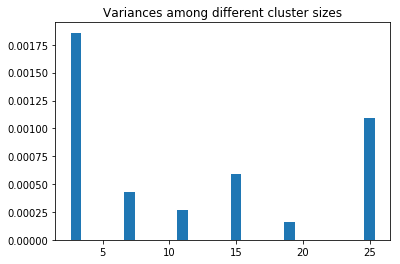

In [17]:
plt.bar(cluster_ns, allvars)
plt.title('Variances among different cluster sizes');

We see that the best Silhouette Score is achieved, when we fit on 15 clusters, so 15 is our choice, what coincides with true number of clusters. Cheers.